### Data Dictionary
Trip_ID = ID for TRIP (Can not be used for purposes of modelling)

Trip_Distance = The distance for the trip requested by the customer

Type_of_Cab = Category of the cab requested by the customer

Customer_Since_Months = Customer using cab services since n months; 0 month means current month

Life_Style_Index = Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour

Confidence_Life_Style_Index = Category showing confidence on the index mentioned above

Destination_Type = Sigma Cabs divides any destination in one of the 14 categories.

Customer_Rating = Average of life time ratings of the customer till date

Cancellation_Last_1Month = Number of trips cancelled by the customer in last 1 month

Var1, Var2 and Var3 = Continuous variables masked by the company. Can be used for modelling purposes

Gender = Gender of the customer

Surge_Pricing_Type = Predictor variable can be of 3 types

In [1]:
import pandas as pd 
import missingno as msno
df=pd.read_csv("sigma_cabs_kaggle.csv")

In [2]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [3]:
df.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [5]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [6]:
for col in df.columns:
    
    if df[col].dtypes=="O":
        most_common = df[col].mode()[0]
        df[col].fillna(most_common, inplace=True, downcast='infer')
        
    else:
        Avg = df[col].median()
        df[col].fillna(Avg, inplace=True)

In [7]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,B,10.0,2.79805,B,E,3.50125,2,61.0,56,77,Male,2
3,T0005689465,61.56,C,10.0,2.79805,B,A,3.45375,0,61.0,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [8]:
df.shape

(131662, 14)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance,131662.0,44.200909,25.522882,0.31000,24.580000,38.20000,60.730000,109.23000
Customer_Since_Months,131662.0,6.015912,3.544411,0.00000,3.000000,6.00000,10.000000,10.00000
Life_Style_Index,131662.0,2.801448,0.207765,1.59638,2.687952,2.79805,2.912815,4.87511
Customer_Rating,131662.0,2.849458,0.980675,0.00125,2.152500,2.89500,3.582500,5.00000
Cancellation_Last_1Month,131662.0,0.782838,1.037559,0.00000,0.000000,0.00000,1.000000,8.00000
Var1,131662.0,62.474883,14.893324,30.00000,61.000000,61.00000,61.000000,210.00000
Var2,131662.0,51.202800,4.986142,40.00000,48.000000,50.00000,54.000000,124.00000
Var3,131662.0,75.099019,11.578278,52.00000,67.000000,74.00000,82.000000,206.00000
Surge_Pricing_Type,131662.0,2.155747,0.738164,1.00000,2.000000,2.00000,3.000000,3.00000


In [10]:
df.Trip_ID.duplicated().sum()

0

In [11]:
df.Trip_ID

0         T0005689460
1         T0005689461
2         T0005689464
3         T0005689465
4         T0005689467
             ...     
131657    T0005908509
131658    T0005908510
131659    T0005908512
131660    T0005908513
131661    T0005908514
Name: Trip_ID, Length: 131662, dtype: object

<Axes: >

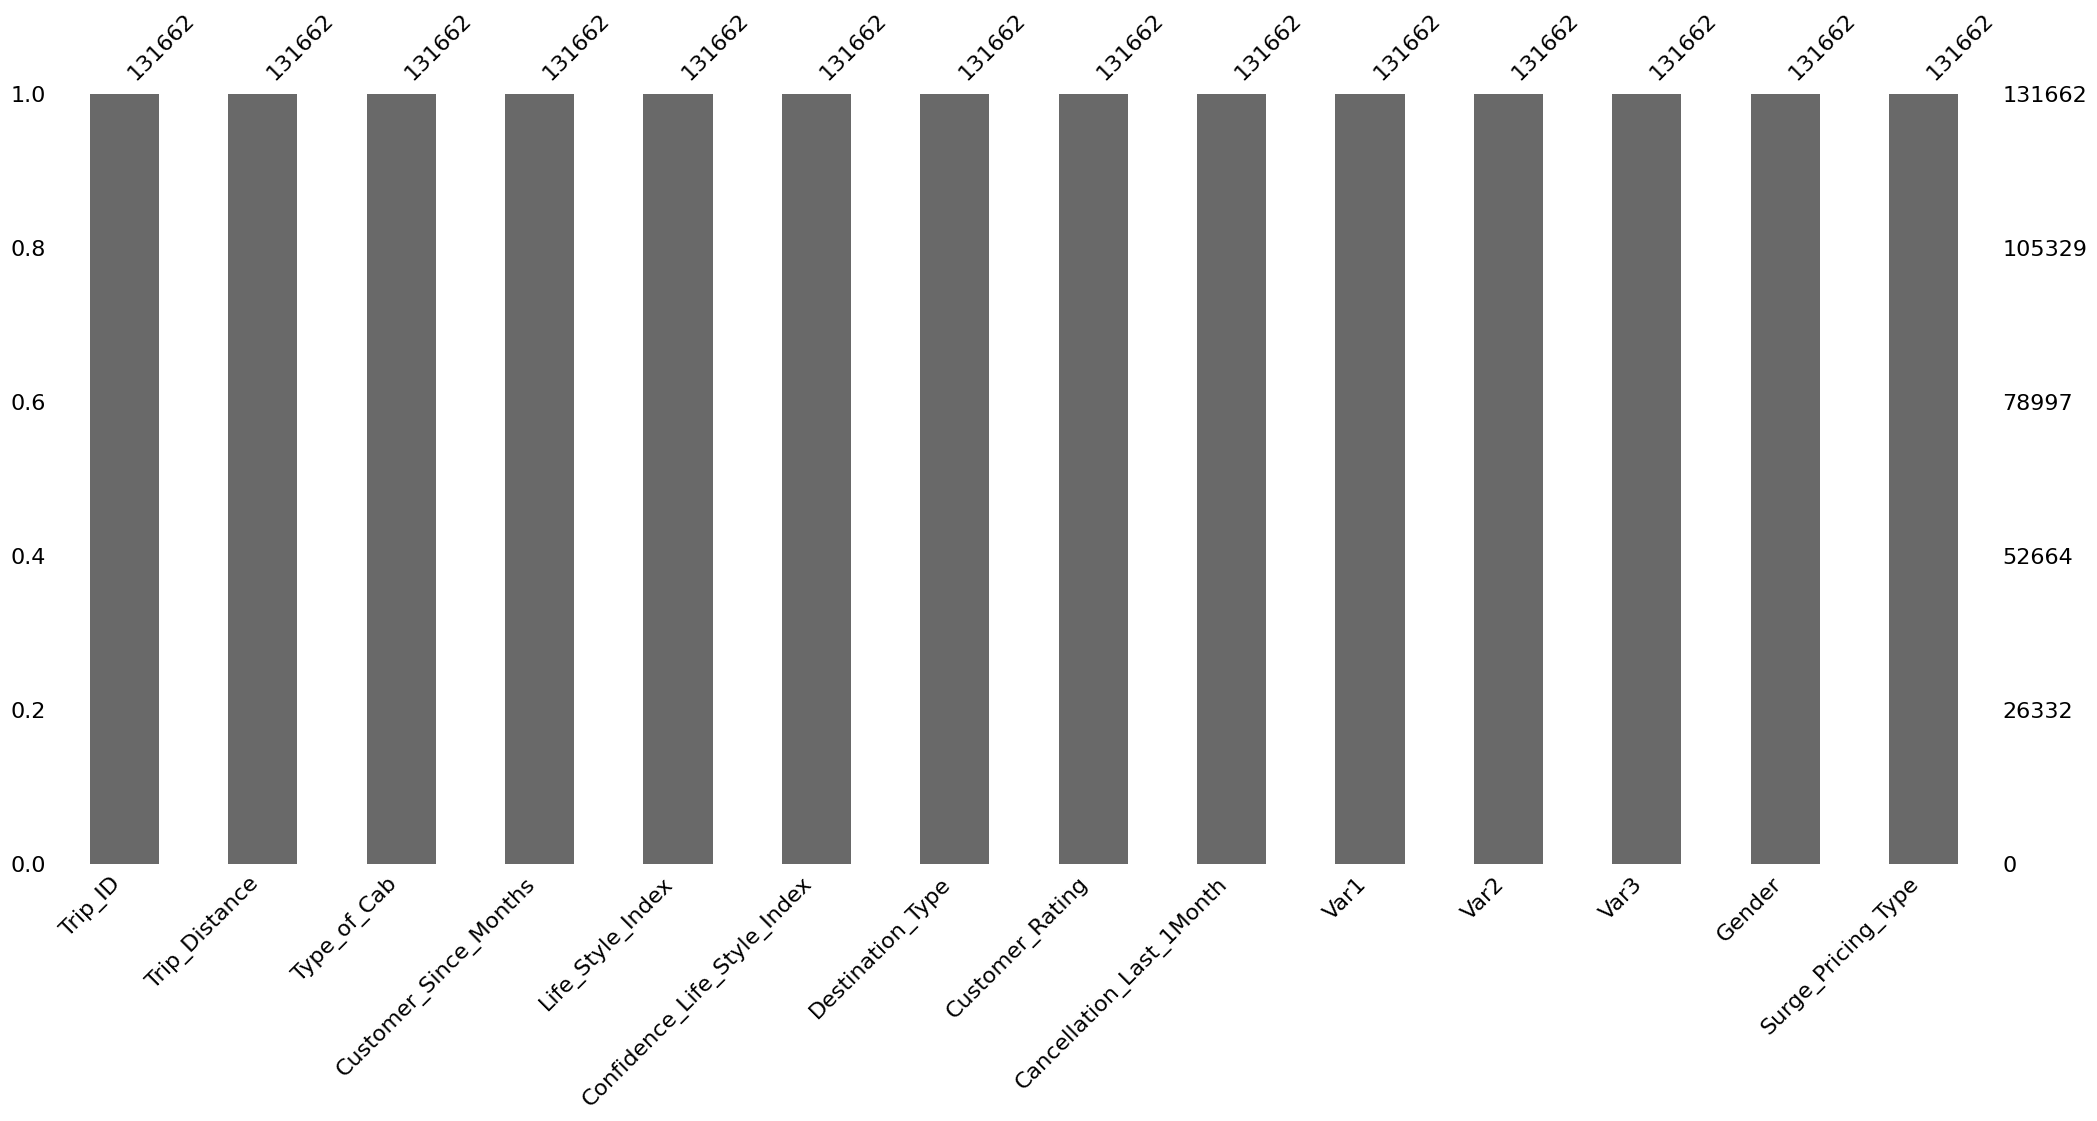

In [12]:
msno.bar(df)

In [13]:
Categorical=df.loc[:, df.dtypes=="O"]
Categorical.head()

,Trip_ID,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
0,T0005689460,B,A,A,Female
1,T0005689461,B,B,A,Male
2,T0005689464,B,B,E,Male
3,T0005689465,C,B,A,Male
4,T0005689467,C,B,A,Male


In [14]:
Numeric=df.loc[:, df.dtypes!="O"]
Numeric.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2


In [15]:
Categorical.Type_of_Cab.value_counts()

B    51346
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [16]:
# Fill null values in column A with the most common value
import warnings
warnings.filterwarnings('ignore')

for col in Categorical.columns:
    
    most_common = Categorical[col].mode()[0]
    Categorical[col].fillna(most_common, inplace=True, downcast='infer')
    
#Numeric    
for col in Numeric.columns:
    
    Avg = Numeric[col].median()
    Numeric[col].fillna(Avg, inplace=True)

In [17]:
df.Var2.median()

50.0

In [18]:
Categorical.isnull().sum()

Trip_ID                        0
Type_of_Cab                    0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
dtype: int64

What is the relationship between the distance of a trip and the customer's rating?

Does the type of cab have an impact on the surge pricing type?

How does the life style index of a customer affect their rating and confidence in the index?

Is there a correlation between the customer's rating and how long they have been a customer?

How does the destination type impact the customer's rating and the surge pricing type?

Does the cancellation rate of a customer affect the surge pricing type of their trips?

Is there a difference in the surge pricing type between male and female customers?

How do the variables Var1, Var2, and Var3 impact the surge pricing type?

Is there a relationship between the customer's gender and the type of cab they choose?

Does the confidence level in the life style index have an impact on the customer's rating and surge pricing type?

<Axes: xlabel='Trip_Distance', ylabel='Customer_Rating'>

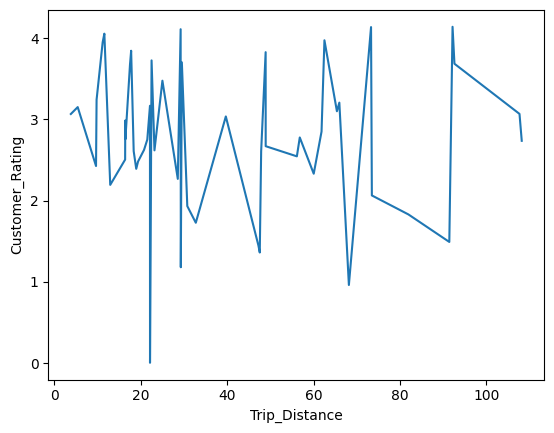

In [19]:
import seaborn as sns
# Create a scatterplot to visualize the relationship between trip distance and customer rating
sns.lineplot(x=df['Trip_Distance'].iloc[200:250], y=df['Customer_Rating'].iloc[200:250], data=df )

<Axes: xlabel='Type_of_Cab', ylabel='Surge_Pricing_Type'>

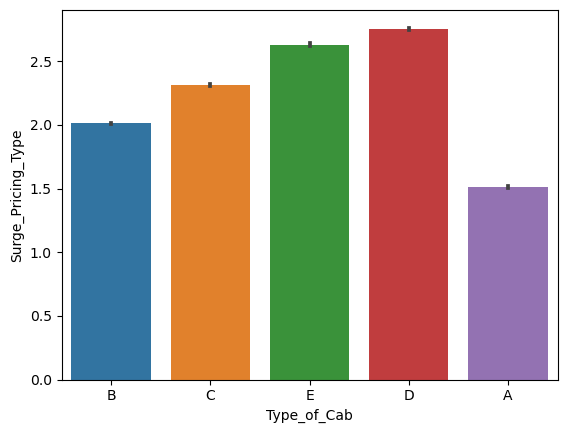

In [21]:
sns.barplot(x='Type_of_Cab', y='Surge_Pricing_Type', data=df)

<Axes: xlabel='Customer_Since_Months', ylabel='Customer_Rating'>

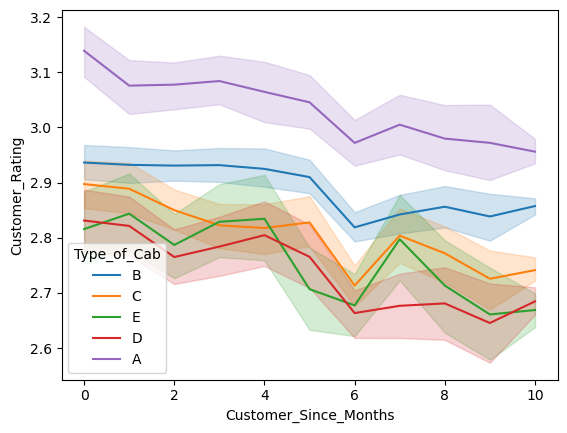

In [55]:
sns.lineplot(x="Customer_Since_Months", y="Customer_Rating", hue="Type_of_Cab", data=df)


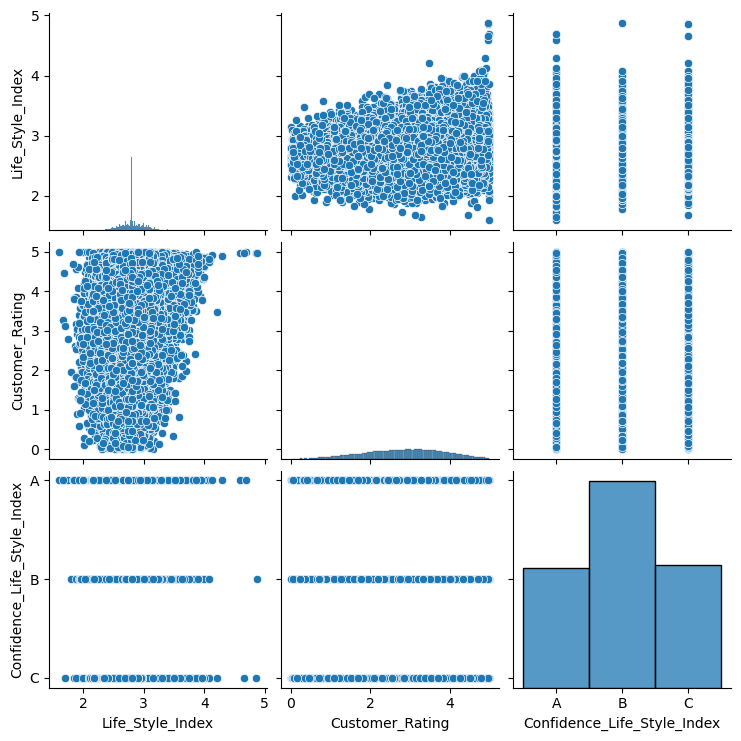

In [21]:
# Create a pairplot to visualize the relationships between life style index, customer rating, and confidence in the index
sns.pairplot(data=df, vars=['Life_Style_Index', 'Customer_Rating', 'Confidence_Life_Style_Index'])

<Axes: xlabel='Customer_Since_Months', ylabel='Customer_Rating'>

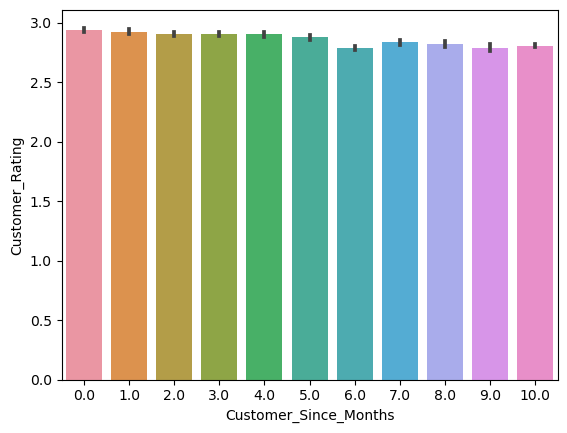

In [22]:
# Create a scatterplot to visualize the relationship between customer rating and customer since months
sns.barplot(x='Customer_Since_Months', y='Customer_Rating', data=df)

<Axes: xlabel='Destination_Type', ylabel='Surge_Pricing_Type'>

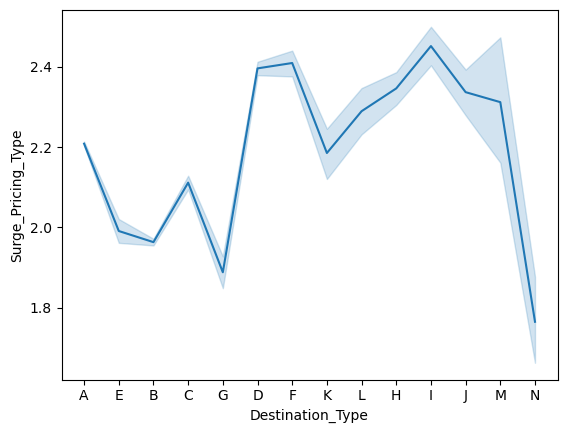

In [23]:
# Create a lineplot to visualize the relationship between destination type and surge pricing type
sns.lineplot(x='Destination_Type', y='Surge_Pricing_Type', data=df)

<Axes: xlabel='Cancellation_Last_1Month', ylabel='Surge_Pricing_Type'>

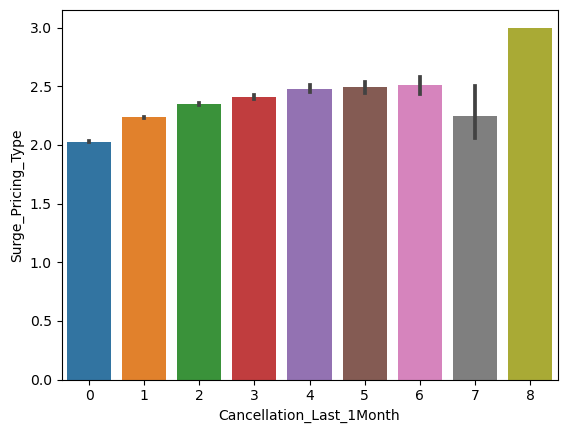

In [53]:
# Create a boxplot to visualize the relationship between cancellation rate and surge pricing type
sns.barplot(x='Cancellation_Last_1Month', y='Surge_Pricing_Type', data=df)

<Axes: xlabel='Gender', ylabel='Customer_Rating'>

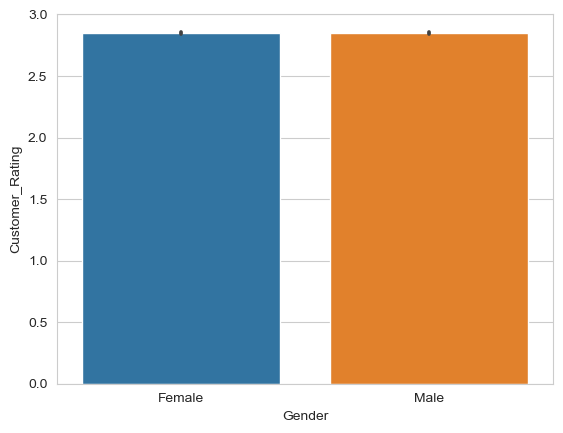

In [36]:
# Create a boxplot to visualize the relationship between gender and surge pricing type
sns.barplot(x='Gender', y='Customer_Rating', data=df)

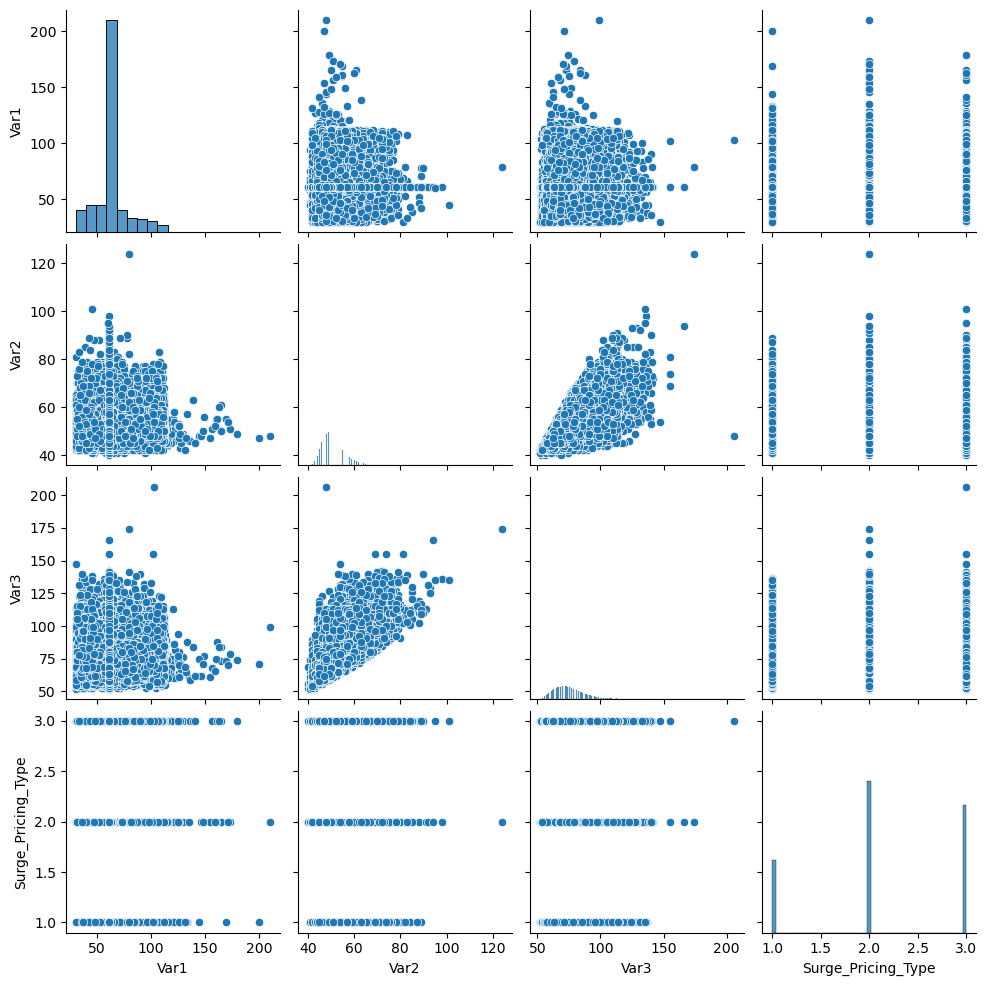

In [26]:
# Create a pairplot to visualize the relationships between Var1, Var2, Var3, and surge pricing type
sns.pairplot(data=df, vars=['Var1', 'Var2', 'Var3', 'Surge_Pricing_Type'])

<Axes: xlabel='Type_of_Cab', ylabel='count'>

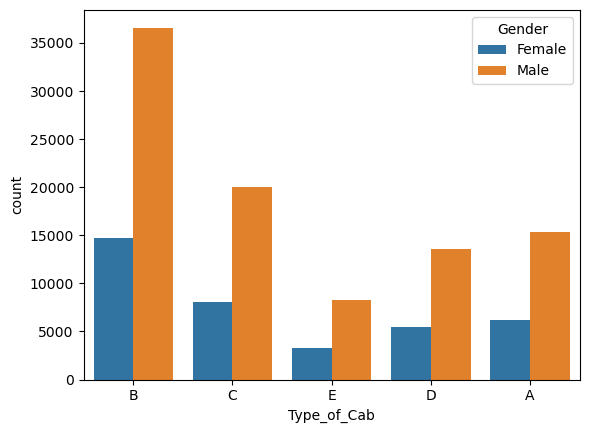

In [80]:
# Create a countplot to visualize the relationship between gender and cab type
sns.countplot(x='Type_of_Cab', hue='Gender', data=df)

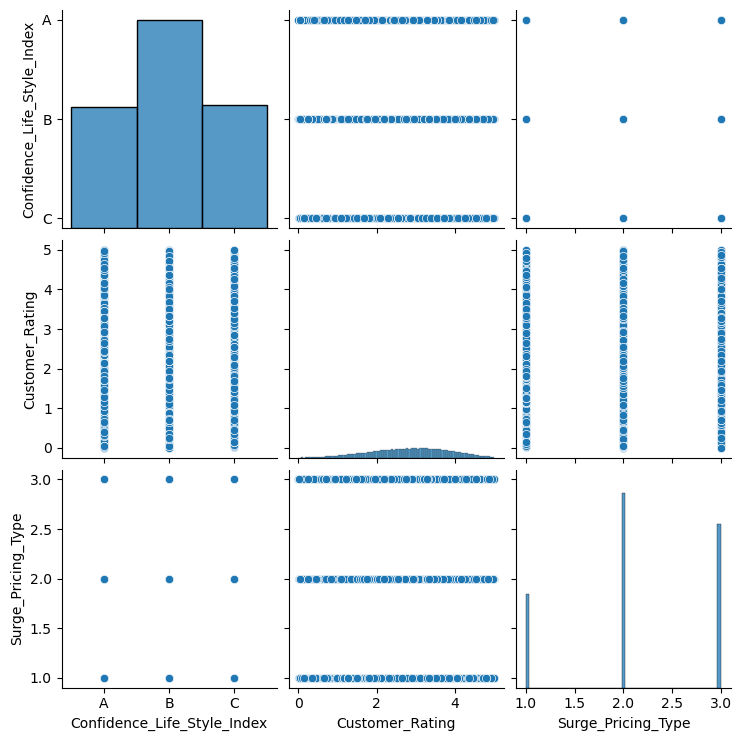

In [28]:
sns.pairplot(data=df, vars=['Confidence_Life_Style_Index', 'Customer_Rating', 'Surge_Pricing_Type'])

<Axes: >

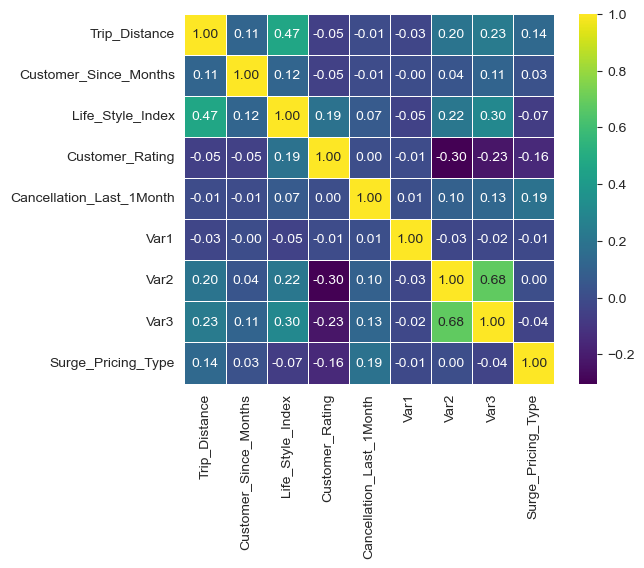

In [31]:
correlation_matrix=Numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5, square=True)

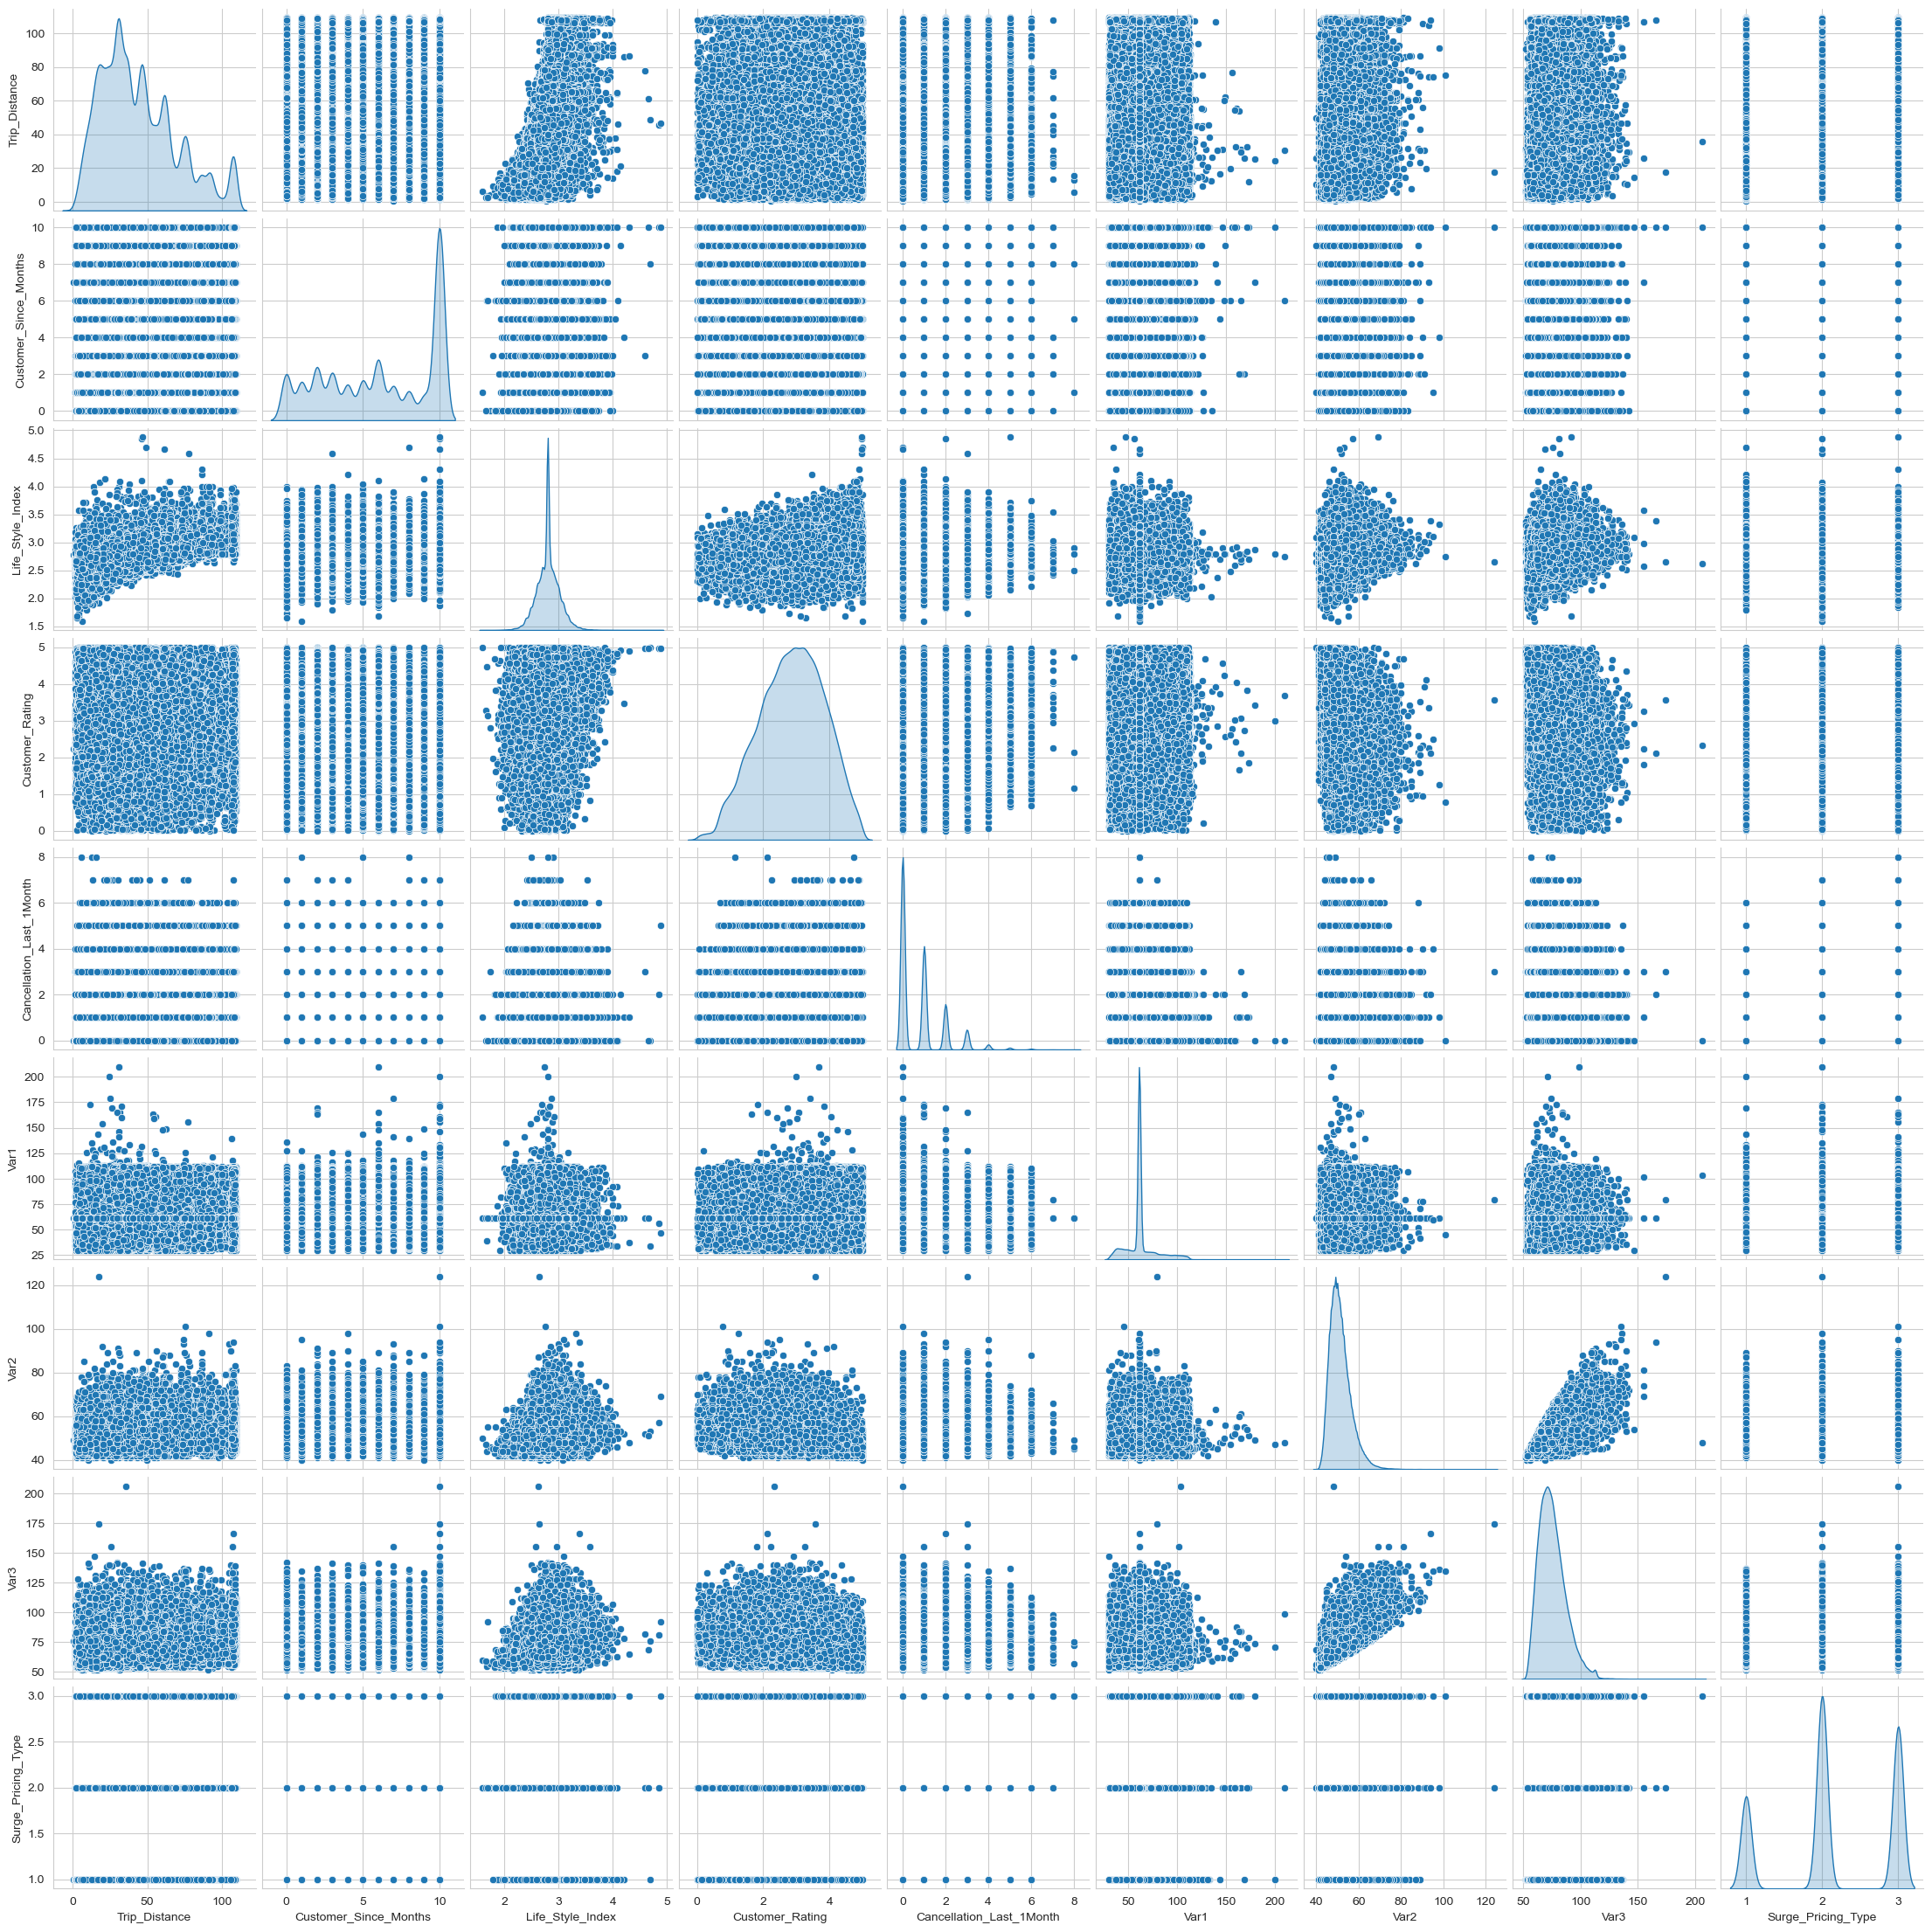

In [32]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.pairplot(data=Numeric,diag_kind="kde",)
plt.show()

<Axes: xlabel='Type_of_Cab', ylabel='Customer_Rating'>

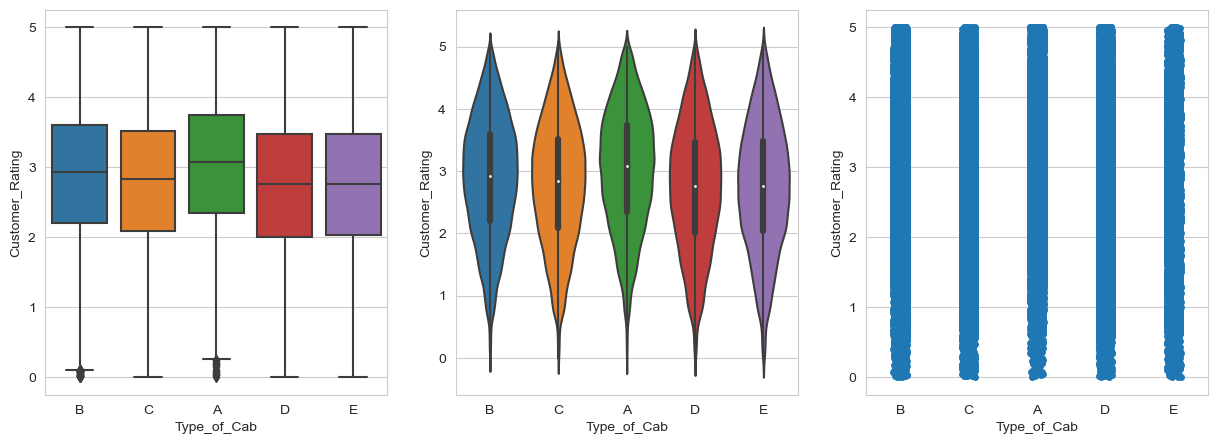

In [40]:
y = 'Customer_Rating'
x = 'Type_of_Cab'
order=df[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=df[x], y=df[y], data=df, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=df[x], y=df[y], data=df, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=df[x], y=df[y], data=df, order=order)

In [37]:
df.head(1)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.905,0,40.0,46,60,Female,2


<Axes: xlabel='Gender', ylabel='Customer_Rating'>

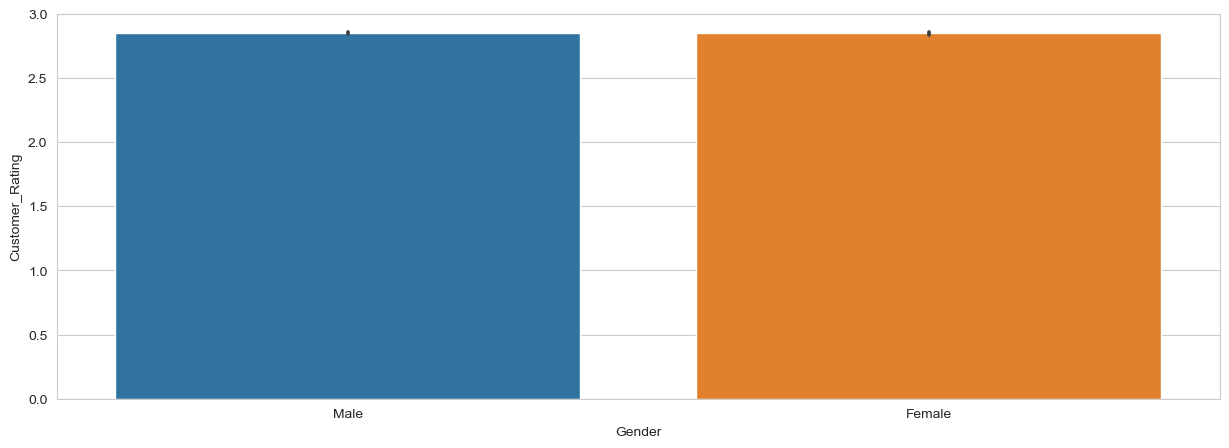

In [83]:
y = 'Customer_Rating'
x = 'Gender'
order=df.groupby(x)[y].mean().sort_values(ascending=False).index
plt.figure(figsize= (15,5))
sns.barplot(x=df[x], y=df[y], data=df, order=order)

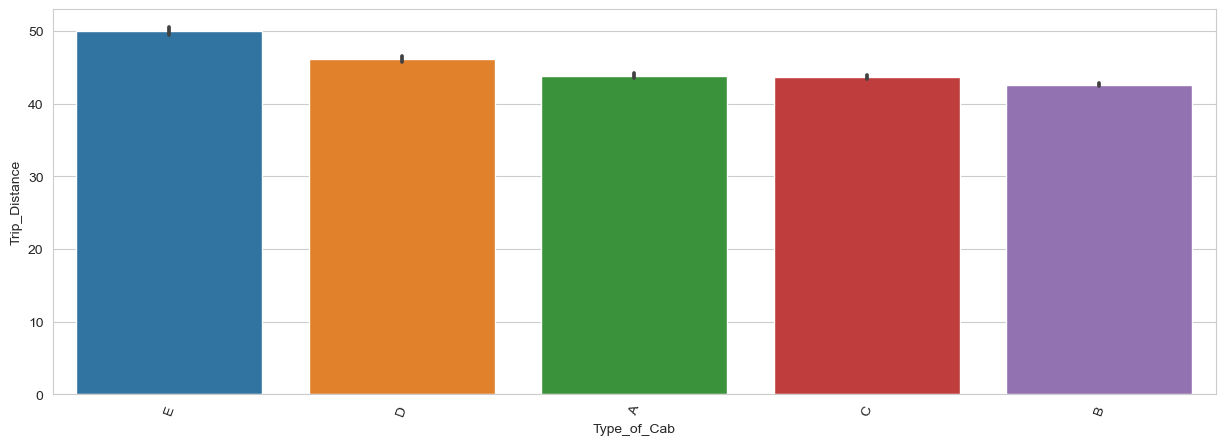

In [43]:
y = 'Trip_Distance'
x = 'Type_of_Cab'
order=order=df.groupby(x)[y].mean().sort_values(ascending=False).index
plt.figure(figsize= (15,5))
sns.barplot(x=df[x], y=df[y], data=df, order=order)
plt.xticks(rotation=70);

In [46]:
# What is the average trip distance in the dataset?
print(df.Trip_Distance.mean(), "Km")

44.20090853853048 Km


In [48]:
# How many different types of cab are there in the dataset?
df.Type_of_Cab.value_counts()

B    51346
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [51]:
# Is there a correlation between customer tenure (Customer_Since_Months) and trip distance?
df["Customer_Since_Months"].corr(df["Trip_Distance"])

0.11441286019087754

In [60]:
# What is the average life style index for customers who have cancelled a trip in the last month?
df.Life_Style_Index.mean()

2.8014483728030872

In [57]:
df.Cancellation_Last_1Month.value_counts()

0    68687
1    36834
2    16223
3     7142
4     1823
5      668
6      266
7       16
8        3
Name: Cancellation_Last_1Month, dtype: int64

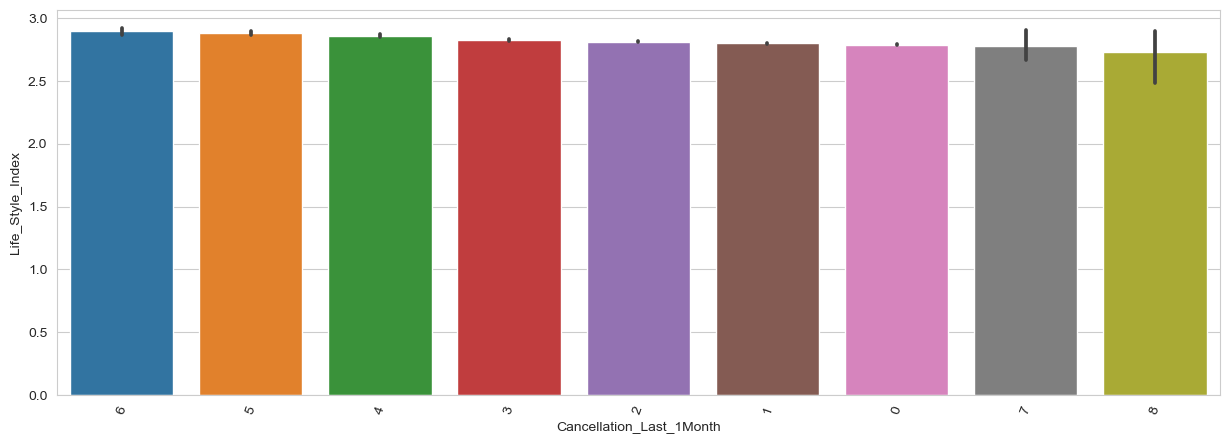

In [59]:
y = 'Life_Style_Index'
x = 'Cancellation_Last_1Month'
order=df.groupby(x)[y].mean().sort_values(ascending=False).index
plt.figure(figsize= (15,5))
sns.barplot(x=df[x], y=df[y], data=df, order=order)
plt.xticks(rotation=70);

<Axes: xlabel='Gender', ylabel='Customer_Rating'>

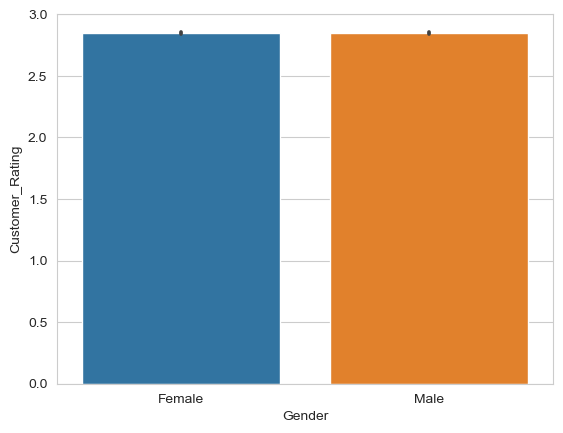

In [62]:
# Is there a significant difference in customer rating between male and female customers?
sns.barplot(x='Gender', y='Customer_Rating', data=df)

In [64]:
# What is the most common reason for trip cancellation?
df.corr()["Cancellation_Last_1Month"]

Trip_Distance              -0.007686
Customer_Since_Months      -0.006180
Life_Style_Index            0.068188
Customer_Rating             0.003595
Cancellation_Last_1Month    1.000000
Var1                        0.011711
Var2                        0.095830
Var3                        0.128686
Surge_Pricing_Type          0.185646
Name: Cancellation_Last_1Month, dtype: float64

In [79]:
# How many unique values are there in the Var1, Var2, and Var3 columns?
for col in df.columns:
    if col=="Var1"or "Var2" or "Var3":
        print(df[col].value_counts())
    
    
# What is the relationship between customer rating and surge pricing type?
# Is there a significant difference in life style index between customers who have a high confidence in the life style index and those who do not?
# What is the most common destination type in the dataset?

T0005689460    1
T0005835674    1
T0005835623    1
T0005835622    1
T0005835621    1
              ..
T0005762419    1
T0005762418    1
T0005762417    1
T0005762415    1
T0005908514    1
Name: Trip_ID, Length: 131662, dtype: int64
30.18     65
30.74     63
29.54     61
31.66     60
29.58     60
          ..
78.47      1
82.58      1
100.04     1
90.15      1
79.38      1
Name: Trip_Distance, Length: 10326, dtype: int64
B    51346
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64
10.0    42680
6.0     13295
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64
2.79805    20196
2.77608       14
2.70697       14
2.78465       13
2.69489       12
           ...  
2.33945        1
2.76991        1
2.48264        1
2.50746        1
2.93773        1
Name: Life_Style_Index, Length: 55978, dtype: int64
B    60548
C    35967
A    35147
Name: Confidence_Life_

In [80]:
df.Gender.value_counts()

Male      93900
Female    37762
Name: Gender, dtype: int64

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


array([[<Axes: xlabel='Trip_Distance', ylabel='Trip_Distance'>,
        <Axes: xlabel='Customer_Since_Months', ylabel='Trip_Distance'>,
        <Axes: xlabel='Life_Style_Index', ylabel='Trip_Distance'>,
        <Axes: xlabel='Customer_Rating', ylabel='Trip_Distance'>,
        <Axes: xlabel='Cancellation_Last_1Month', ylabel='Trip_Distance'>],
       [<Axes: xlabel='Trip_Distance', ylabel='Customer_Since_Months'>,
        <Axes: xlabel='Customer_Since_Months', ylabel='Customer_Since_Months'>,
        <Axes: xlabel='Life_Style_Index', ylabel='Customer_Since_Months'>,
        <Axes: xlabel='Customer_Rating', ylabel='Customer_Since_Months'>,
        <Axes: xlabel='Cancellation_Last_1Month', ylabel='Customer_Since_Months'>],
       [<Axes: xlabel='Trip_Distance', ylabel='Life_Style_Index'>,
        <Axes: xlabel='Customer_Since_Months', ylabel='Life_Style_Index'>,
        <Axes: xlabel='Life_Style_Index', ylabel='Life_Style_Index'>,
        <Axes: xlabel='Customer_Rating', ylabel='Life_Styl

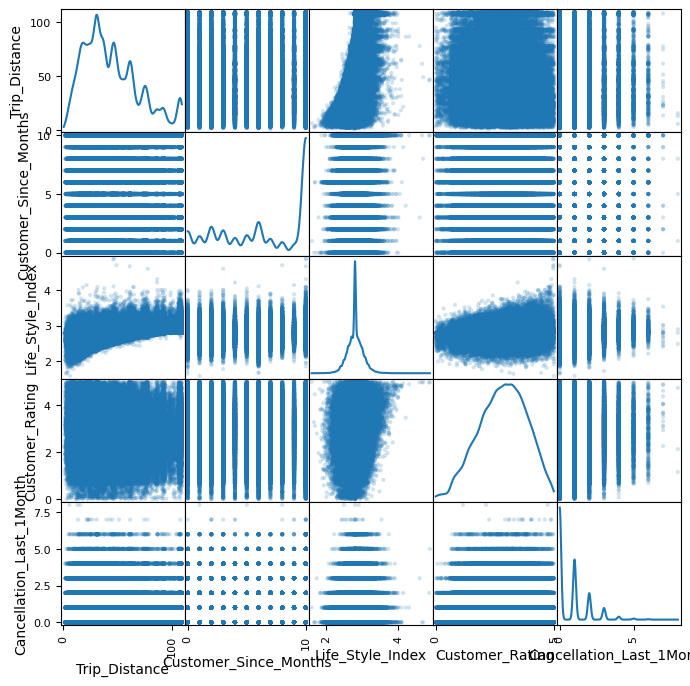

In [82]:
from pandas.plotting import scatter_matrix
scatter_matrix(Numeric.iloc[:, :5], alpha=0.2, figsize=(8,8), diagonal="kde")

In [83]:
# Perform one hot encoding on the 'Type_of_Cab' column
one_hot_encoded = pd.get_dummies(Categorical["Gender"])

# Add the one hot encoded columns to the original DataFrame
Categorical = pd.concat([Categorical, one_hot_encoded], axis=1)
Categorical.head()

,Trip_ID,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender,Female,Male
0,T0005689460,B,A,A,Female,1,0
1,T0005689461,B,B,A,Male,0,1
2,T0005689464,B,B,E,Male,0,1
3,T0005689465,C,B,A,Male,0,1
4,T0005689467,C,B,A,Male,0,1


In [84]:
df1 = StandardScaler().fit_transform(Numeric)
df1=pd.DataFrame(df1, columns=['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'])
df1

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
0,-1.466568,-1.415166,-1.798953,1.076346,-0.754502,-1.509063,-1.043456,-1.304086,-0.210994
1,-0.577167,1.124052,-0.091442,0.612378,-0.754502,-1.643352,0.962110,0.250555,-0.210994
2,-0.102689,1.124052,-0.016357,0.664638,1.173106,-0.099030,0.962110,0.164186,-0.210994
3,0.680141,1.124052,-0.016357,0.616202,-0.754502,-0.099030,0.159884,-0.094921,1.143724
4,0.421157,1.124052,1.121855,0.563942,3.100714,-0.770475,-0.441786,2.323410,-0.210994
...,...,...,...,...,...,...,...,...,...
131657,-1.272624,-1.415166,-0.284738,0.444126,-0.754502,-0.099030,-0.842899,0.077817,1.143724
131658,1.199285,0.277646,0.044000,-2.451848,-0.754502,-0.099030,2.366007,1.114244,-0.210994
131659,-0.157934,1.124052,0.934720,0.496386,-0.754502,-0.099030,-0.642343,-0.008552,-0.210994
131660,0.104969,-0.568760,1.183993,1.333823,0.209302,-1.039052,0.560997,0.336924,-0.210994


In [20]:
Categorical.columns

Index(['Trip_ID', 'Type_of_Cab', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender'],
      dtype='object')

Profiling and describing potential segments:
To profile and describe potential segments, you could perform a cluster analysis on the dataset using relevant variables such as Trip_Distance, Type_of_Cab, Customer_Since_Months, Life_Style_Index, Customer_Rating, Cancellation_Last_1Month, Var1, Var2, Var3, Gender, and Destination_Type. This would help to identify groups of customers who share similar characteristics and needs. You can then describe each segment based on their demographics, psychographics, behaviors, and preferences, using data visualization and statistical techniques.


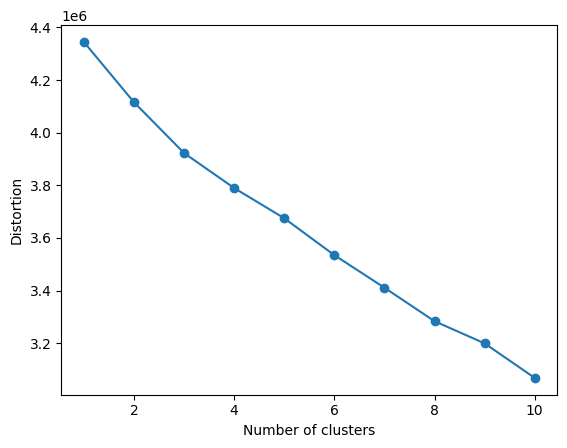

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the trip ID column as it is not useful for clustering
df.drop('Trip_ID', axis=1, inplace=True)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Type_of_Cab', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender'])

# Normalize the data
df_norm = (df - df.mean()) / df.std()

# Determine the optimal number of clusters using elbow method
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_norm)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Perform clustering with the optimal number of clusters
n_clusters = 4 # Replace with the optimal number of clusters
km = KMeans(n_clusters=n_clusters, random_state=0)
km.fit(df_norm)

# Add the cluster labels to the original dataframe
df['Cluster'] = km.labels_

# Analyze the characteristics of each cluster
cluster_means = df.groupby('Cluster').mean()
cluster_sizes = df.groupby('Cluster').size()
cluster_props = cluster_sizes / df.shape[0] * 100
cluster_stats = pd.concat([cluster_means, cluster_sizes, cluster_props], axis=1)
cluster_stats.columns = list(df.columns[:-1]) + ['Size', 'Proportion']

# Visualize the distribution of each variable by cluster
# sns.pairplot(df, hue='Cluster')
# plt.show()


In [21]:

# Save the cluster statistics dataframe as a CSV file
cluster_stats.to_csv('cluster_stats.csv', index=False)

In [22]:
import pandas as pd

# Load the cluster statistics dataframe from the previous step
cluster_stats = pd.read_csv('cluster_stats.csv')

# Define the target segment based on your business goals
target_segment = cluster_stats[cluster_stats['Proportion'] == cluster_stats['Proportion'].max()].index[0]

# Print the characteristics of the target segment
print('Target Segment:', target_segment)
print(cluster_stats.loc[target_segment])

Target Segment: 0
Trip_Distance                       42.629179
Customer_Since_Months                6.005473
Life_Style_Index                     2.800796
Customer_Rating                      2.882599
Cancellation_Last_1Month             0.716512
Var1                                62.629650
Var2                                51.157792
Var3                                75.050403
Surge_Pricing_Type                   2.011744
Type_of_Cab_A                        0.000000
Type_of_Cab_B                        1.000000
Type_of_Cab_C                        0.000000
Type_of_Cab_D                        0.000000
Type_of_Cab_E                        0.000000
Confidence_Life_Style_Index_A        0.296674
Confidence_Life_Style_Index_B        0.439314
Confidence_Life_Style_Index_C        0.264013
Destination_Type_A                   0.583707
Destination_Type_B                   0.246718
Destination_Type_C                   0.055545
Destination_Type_D                   0.041990
Destination_Type

In [86]:
pca = PCA(n_components=2)
pca_model=pca.fit(df1)
df_trans=pd.DataFrame(pca_model.transform(df1), columns=['pca1', 'pca2'])

In [87]:
df_trans

,pca1,pca2
0,-3.061020,-0.309564
1,0.406389,0.292138
2,0.745573,0.128327
3,0.306831,0.495145
4,2.152543,0.703456
...,...,...
131657,-1.366653,-0.504591
131658,2.850263,-1.557352
131659,-0.087115,1.244441
131660,0.671784,1.369776


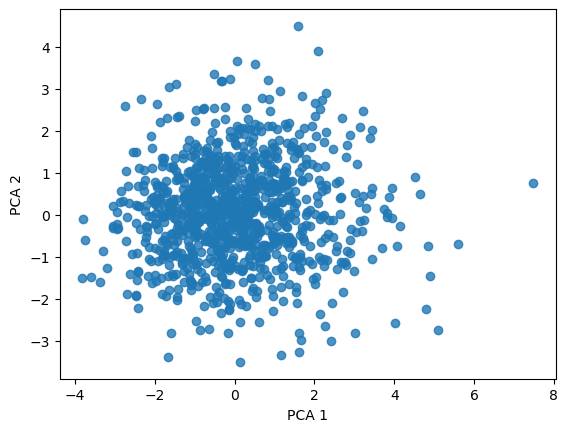

In [91]:
import matplotlib.pyplot as plt
plt.scatter(df_trans['pca1'].iloc[:1000], df_trans['pca2'].iloc[:1000], alpha=0.8,)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

 correlation between each principal component and the features from the original dataset.

In [92]:
comp=pd.DataFrame(pca_model.components_, columns=['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'])
print(comp)

   Trip_Distance  Customer_Since_Months  Life_Style_Index  Customer_Rating  \
0       0.389473               0.159124          0.386405        -0.217088   
1       0.340471               0.118593          0.560067         0.607117   

   Cancellation_Last_1Month      Var1      Var2      Var3  Surge_Pricing_Type  
0                  0.132469 -0.045461  0.537883  0.560633            0.057553  
1                 -0.151914 -0.076049 -0.242637 -0.128951           -0.288768  


In [93]:
print(pca_model.explained_variance_ratio_)

[0.2414846  0.15303703]


In [94]:
pca = PCA()
pca_model=pca.fit(df1)

In [95]:
print(pca_model.explained_variance_ratio_)

[0.2414846  0.15303703 0.13029982 0.11452115 0.11113335 0.10150638
 0.06695844 0.04721569 0.03384352]


In [96]:
import numpy as np
print(np.cumsum(pca_model.explained_variance_ratio_))

[0.2414846  0.39452163 0.52482145 0.63934261 0.75047596 0.85198234
 0.91894078 0.96615648 1.        ]


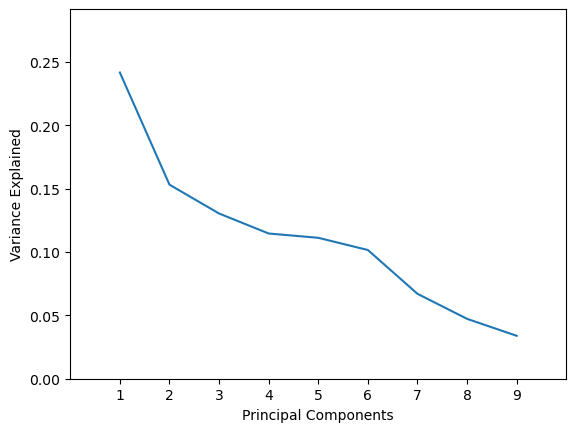

In [97]:
plt.plot(list(range(1,10)), pca.explained_variance_ratio_)
plt.axis([0, 10, 0, max(pca.explained_variance_ratio_)+0.05])
plt.xticks(list(range(1,10)))
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

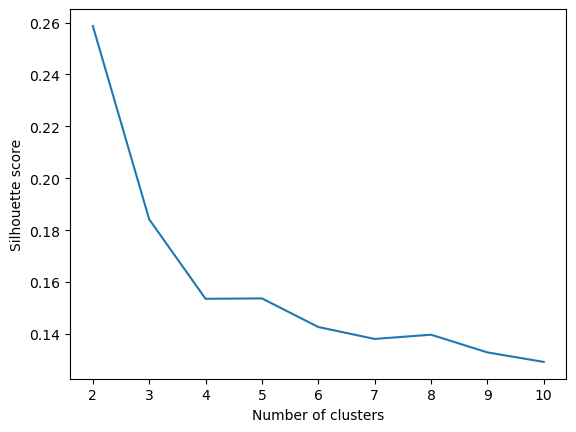

         Customer_Since_Months  Customer_Rating  Cancellation_Last_1Month  \
Cluster                                                                     
0                     6.201873         2.903053                  0.809104   
1                     6.028080         3.180410                  0.382065   
2                     6.207246         2.912645                  1.229779   
3                     6.627803         2.305350                  1.009064   

              Var1       Var2       Var3  Surge_Pricing_Type  Gender_Female  \
Cluster                                                                       
0        64.146056  51.175205  76.658956            2.246713       1.000000   
1        66.240650  49.620206  73.232166            1.694049       0.000000   
2        63.650366  49.642148  73.026437            2.875419       0.000000   
3        61.248354  58.016983  91.704704            2.260567       0.039023   

         Gender_Male  
Cluster               
0           0.00

In [98]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('sigma_cabs_kaggle.csv', usecols=['Customer_Since_Months', 'Cancellation_Last_1Month', 'Customer_Rating', 'Var1', 'Var2', 'Var3', 'Gender', 'Surge_Pricing_Type'])

# Preprocess the data
df = pd.get_dummies(df, columns=['Gender'])
df = df.dropna()

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determine the optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the silhouette scores to determine the optimal number of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_scaled)
clusters = kmeans.labels_

# Add the cluster labels to the original data
df['Cluster'] = clusters

# Analyze the clusters
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


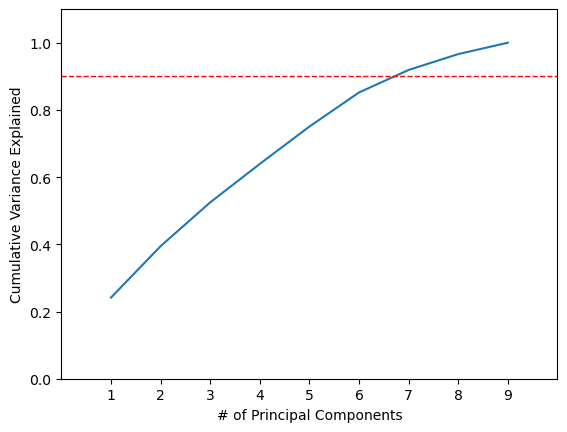

In [100]:
plt.plot(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.axis([0, 10, 0, 1.1])
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=1)
plt.xticks(list(range(1,10)))
plt.xlabel('# of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()